In [83]:
import pandas as pd
survey_raw_df = pd.read_csv('survey_results_public.csv')
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [84]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [85]:
schema_fname= pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText
schema_fname

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [86]:
schema_fname['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

# Data Preparation and Cleaning
While the survwy reposnses contain a wealth of information, we'll limit our analysis to the following areas:
* Demographics of the survey respondents and the global programming community
* Distribution of programming skills, experience and preferences.
* Employment-related information, preferences & opinions.

Let's select a subset of columns with the relevant data for our analysis.

In [87]:
selected_columns = [#Demographics
'Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor',
#Programming experience
'Hobbyist', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck',
#Employment
'Employment', 'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime', 'NEWEdImpt']

In [88]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame _survey df_, which we can continue to modify further without affecting the original data frame.  

In [89]:
survey_df = survey_raw_df[selected_columns].copy()

In [90]:
schema = schema_fname[selected_columns]

In [91]:
survey_df.shape

(64461, 20)

In [92]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type _object_, either because they contain values of different types, or they contain empty values, which are represented using _NaN_. It appears that every column contains some empty values, since the Non-Null count for every column is lower than the total number of rows(64461), We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns(_Age_ and _WorkWeekHrs_), even though there are few other columns which have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types, while ignoring any non-numeric value(they will get converted to NaNs)

In [93]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [94]:
survey_df.Age1stCode

0         13
1         19
2         15
3         18
4         16
        ... 
64456     16
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Age1stCode, Length: 64461, dtype: object

In [95]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [96]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors= 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors= 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors= 'coerce')

In [97]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimumm value is 1 and max value is 279. This is common issue with surveys: reponses may contain invalid due to accidental or intentional errors while responding. A simple fix would be ignore the rows where the value in the age column is higher than 100 years or lower than 10 years as invalid survey reponses. This can be done using the _.drop_ method. 

In [98]:
survey_df.drop(survey_df[survey_df.Age<10].index, inplace=True) #.index functions removes all the survey IDs associated with the concerned condition.
survey_df.drop(survey_df[survey_df.Age>100].index, inplace=True)


The same holds true for _WorkWeekHrs_. Let's ignore entries where the value for the column is higher than 140 hours. (~20hours per day)

In [99]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index,inplace=True)

The gender column also allows picking multiple options, but to simplify our analysis, we'll remove values containing containing more than 2 options.

In [100]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [101]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [102]:
import numpy as np

In [103]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

The data is now cleaned and ready for analysis.
The cleanup included:
* Converted columns 'Age1stCode', 'YearsCode' and 'YearCodePro' into numeric type.
* Removed rows with agefirstcode <5 and agefirstcode > 100. 
* Removed rows with workweekhrs >140, since a workweek only has 120 hours(Mon-Fri).
* Replaced rows having ';' in gender column with NaN to simplify the analysis.


# Exploratory Data Analysis
Before we can ask some questions about the survey responses, it would help to understand what the demographics i.e. country, age, gender, education level, employment level, etc. of the responders look like. It is important to explore these variable in order to understand how representative the survey is of the worldwide programming community, as a survey of this scale generally tends to have some selection bias.

In [104]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']= (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country 
Let's look at the number of countries from which there are responses in the survey and plot the 10 countries with the highest number of responses.

In [105]:
schema.Country

'Where do you live?'

In [106]:
survey_df.Country.unique()  #Gives all the unique values in the dataframe.
survey_df.Country.nunique() #Gives the number of unique values in the dataframe.

183

In [107]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

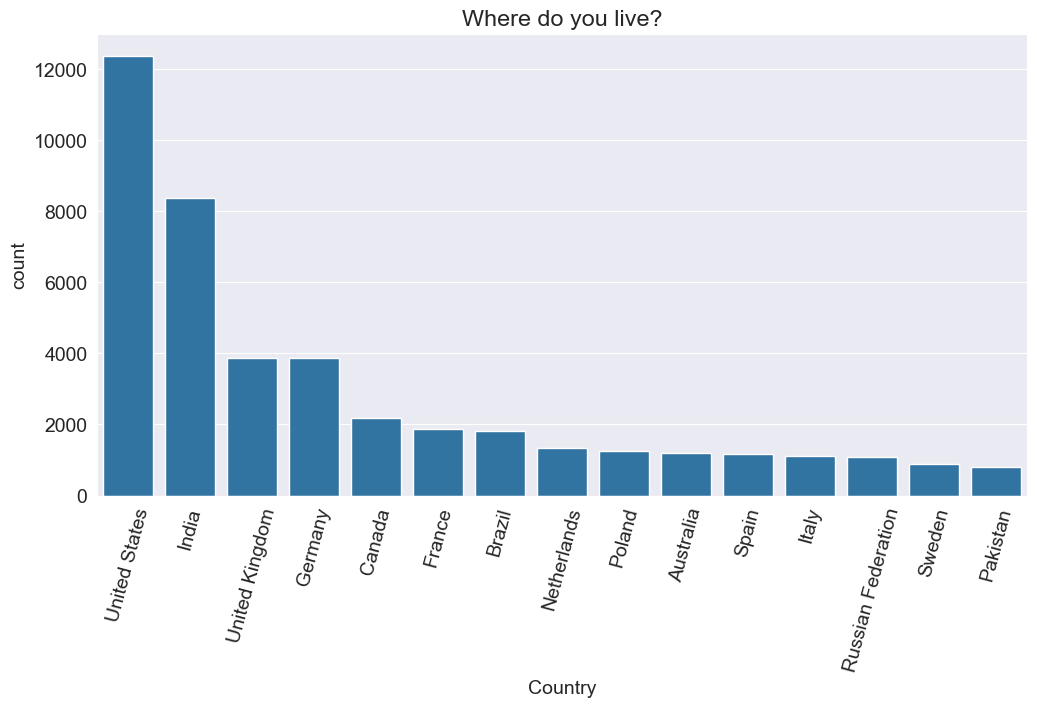

In [108]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

# Insight
It appears that disprotionately high number of respondents are from USA and India, which one might expect as these countries have highest populations in terms of english speakers given that stackoverflow itself is an english platform and the survey is in English as well. So there's a bias in the survey and cannot be taken as a complete data for the entire coding community. 

**Excercise**  Try finding the precentage responses from English speaking v/s Non-english speaking countries. 

In [109]:
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

In [110]:
country_counts=survey_df.Country.value_counts()

In [111]:
survey_df1=survey_df.groupby('Country').size().reset_index(name='Count')
survey_df1.sort_values(by='Count', ascending=False)

,Country,Count
175,United States,12371
71,India,8364
173,United Kingdom,3881
59,Germany,3864
30,Canada,2175
...,...,...
102,Marshall Islands,1
93,Liechtenstein,1
91,Lesotho,1
139,Saint Lucia,1


In [112]:
Top5=survey_df1['Count'].head(5).sum()

In [113]:
Rest=survey_df1['Count'].iloc[5:15].sum()

In [114]:
ratio=100*Top5/Rest
# print("The percentage of participants from Top 15 of English to non-english speaking countries is {:f}%".format(ratio))
print(f'From Top 15 countries the percentage of participants from English to non-english speaking countries is: {ratio:.2f}%')
ratio

From Top 15 countries the percentage of participants from English to non-english speaking countries is: 8.81%


np.float64(8.813202247191011)

# Age
The distribution of the age of respondents is another important factor to look at and we can use a histogram to visualize it.

In [115]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

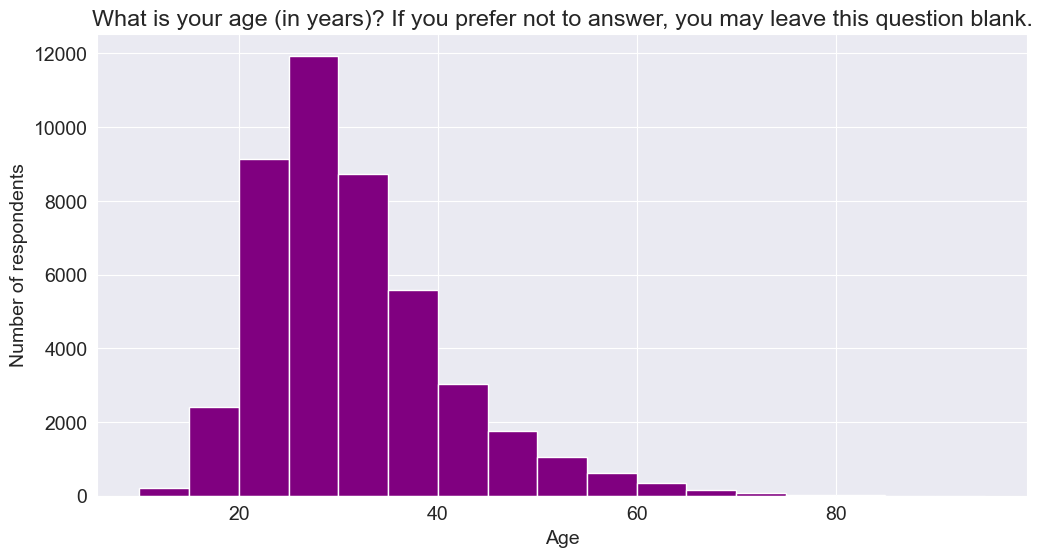

In [116]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survey_df.Age, bins=np.arange(10,100,5), color ='purple');


It appears that a large pecentage of repondents are in the range of 20-45, which is somewhat representative of the programming community in general, as a lot of young people have taken up computer as their field of study or profession in the last 20 years.

**Excercise**: You may want to filter out repsonses by age (or age group), if you'd like to analyze and compare the results of the survey for different age groups. Create a new column called _AgeGroup_ which contains values like _Less than 10 years_, _10-18 years, 18-30 years, 30-45 years, 45-60 years, Older than 60 years_ and repeat the analysis in the rest of this notebook for each age group.

In [117]:
def age_group(age):
    if age < 10:
        return 'Less than 10'
    elif age < 18:
        return '10-18'
    elif age <30:
        return '18-30'
    elif age < 45:
        return '30-45'
    elif age < 60:
        return '45-60'
    elif pd.isna(age):
        return 'Nan'
    else:
        return 'Older than 60'
    
survey_df['Age_Group'] = survey_df['Age'].apply(age_group)
survey_df



,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,Age_Group
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,Nan
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,Nan
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,18-30
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,30-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,Nan
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Nan
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Nan


# Gender 
Let's look at the distribution of responses for the Gender. It's a well known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [118]:
gender_counts=survey_df.Gender.value_counts(dropna=False)
gender_counts

Gender
Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

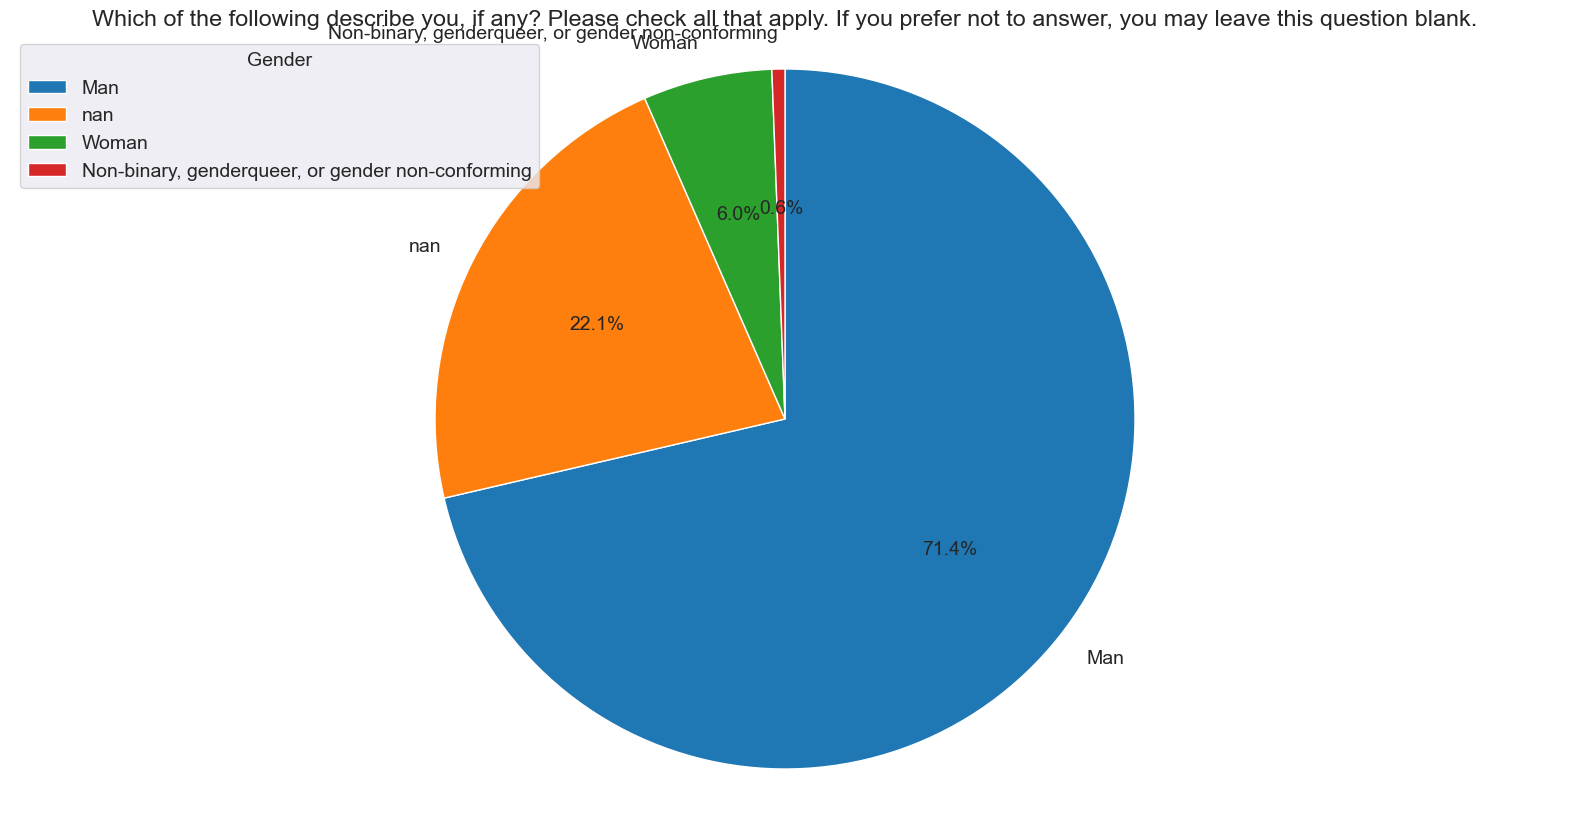

In [119]:
plt.figure(figsize=(20,10))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%', startangle=90, counterclock=False)
plt.legend(gender_counts.index, title="Gender", loc="upper left")
plt.axis('equal')
plt.show()

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women or non-binary. This number is lower than the overall percentage of women and non-binary genders in the programming community - which is estimated to be around 12%.

**Excercise**: It would be interesting to compare the survey responses and preferences across genders and you are encouraged to repeat this analysis with these breakdowns. How do the relative education levels differ across genders? How do salaries differ? 

In [120]:
grouped_df = survey_df.groupby(['Gender', 'EdLevel'])['EdLevel'].count().unstack()
print(grouped_df)

EdLevel                                            Associate degree (A.A., A.S., etc.)  \
Gender                                                                                   
Man                                                                               1484   
Non-binary, genderqueer, or gender non-conforming                                   14   
Woman                                                                              101   

EdLevel                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)  \
Gender                                                                                            
Man                                                                                       20493   
Non-binary, genderqueer, or gender non-conforming                                           139   
Woman                                                                                      1924   

EdLevel                                            I 

# Education Level
Formal education in computer science is often considered an important requirement of becoming a programmer. We'll use a horizontal bar plot to compare education levels of respondents.

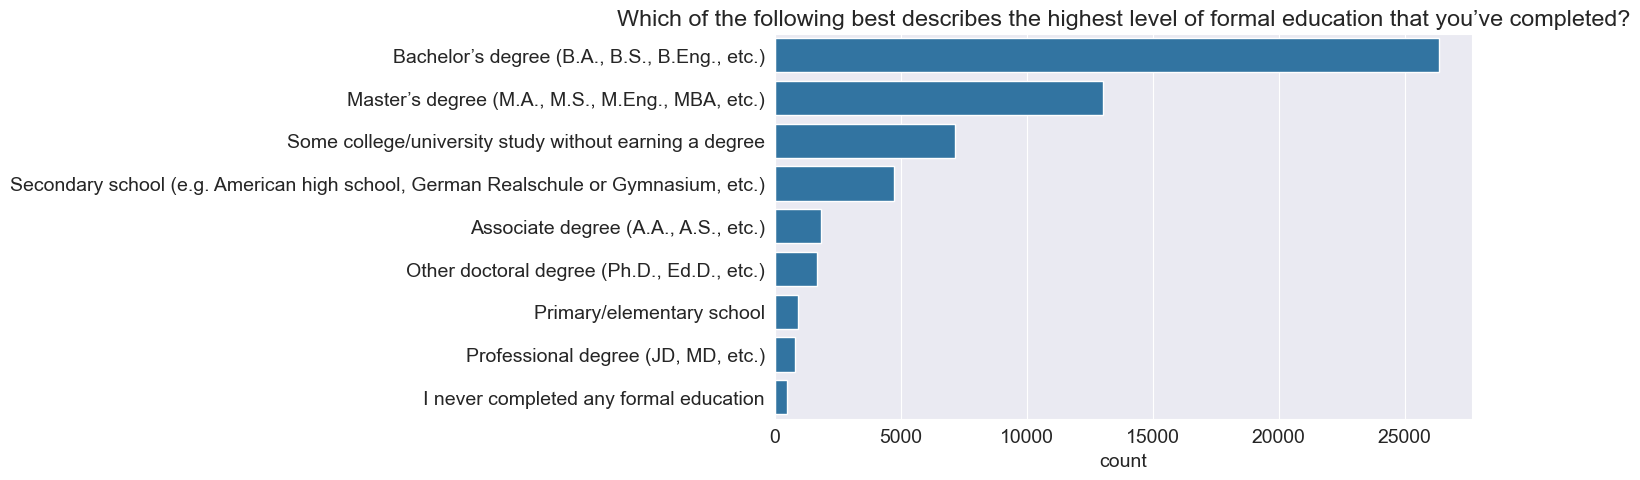

In [121]:
sorted_Edlevels= survey_df['EdLevel'].value_counts().index
sns.countplot(y=survey_df.EdLevel, order=sorted_Edlevels)
# plt.xticks(rotation=75)
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that more than half of the respondents hold a bachelor's or master's degree, so most programmers definitely seem to have some college education, though it's not clear from this graph aline if they hold a degree in computer science.

**Excercise**: The graph currently shows the number of respondents for each option, let's see if we can modify it to show percentage instead. Further we need to break down the graph to compare the percentage for each degree for men vs women.

In [122]:
sorted_Edlevels1 = survey_df.EdLevel.value_counts()

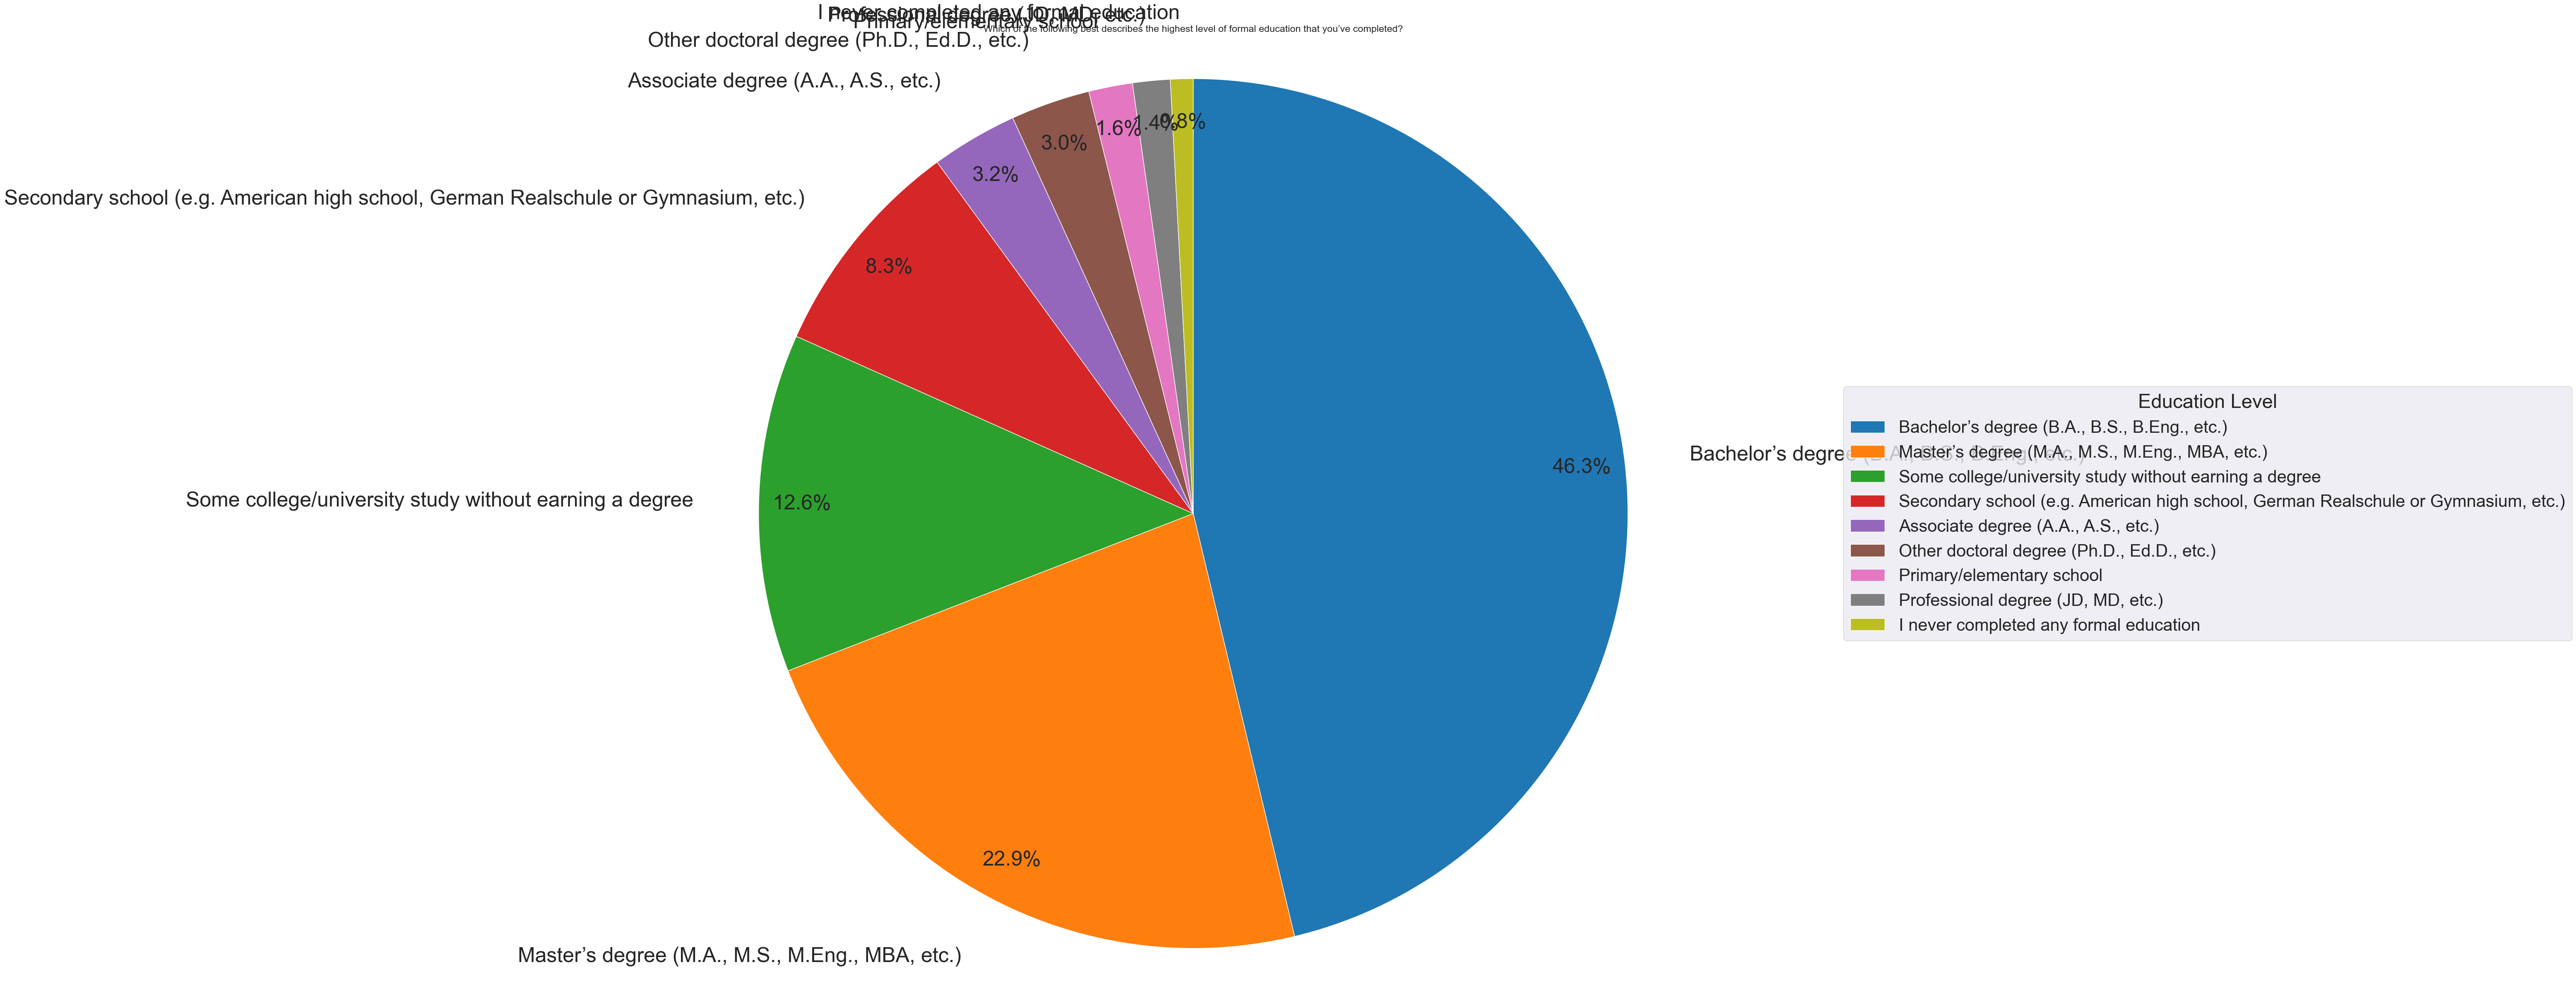

In [123]:
plt.figure(figsize=(40,30))
plt.title(schema.EdLevel)
plt.pie(sorted_Edlevels1, labels=sorted_Edlevels1.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        counterclock=False, 
        textprops={'fontsize':36},
        labeldistance=1.15,
        pctdistance=0.9)
plt.legend(sorted_Edlevels1.index, 
           title="Education Level",
           title_fontsize='34',
           fontsize='30', 
           loc="center left", 
           bbox_to_anchor=(1,0.5))
plt.axis('equal')
plt.show()

In [124]:
schema.UndergradMajor

'What was your primary field of study?'

In [125]:
survey_df.UndergradMajor.value_counts()

UndergradMajor
Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science 

Text(0.5, 0, 'Percentage')

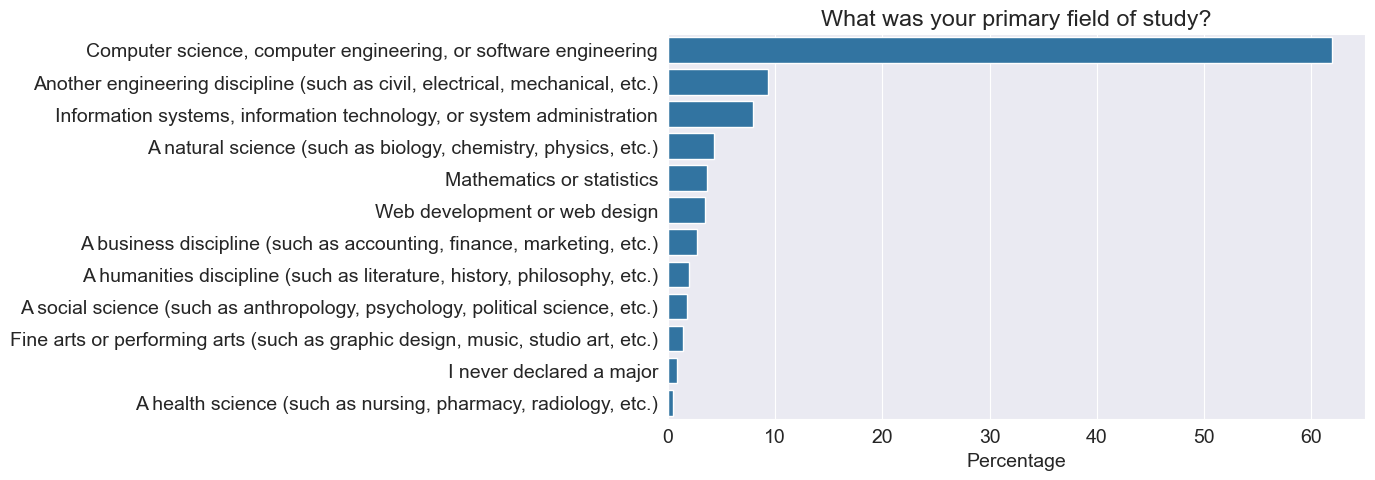

In [126]:
undergrad_pct=survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count() 
sns.barplot(x=undergrad_pct, y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage')

This tells that nearly 40% of the programmers holding a college degree have a field of study other than computer science, which is encouraging. This seems to suggest that while college education is helpful in general, you do not need to pursue a major in CS to become a successful programmer.

**Excercise**: Analyze the results of the _NEWEDImpt_ column for respondents who hold some college degree vs those who don't. Find if there's a difference in opinion.

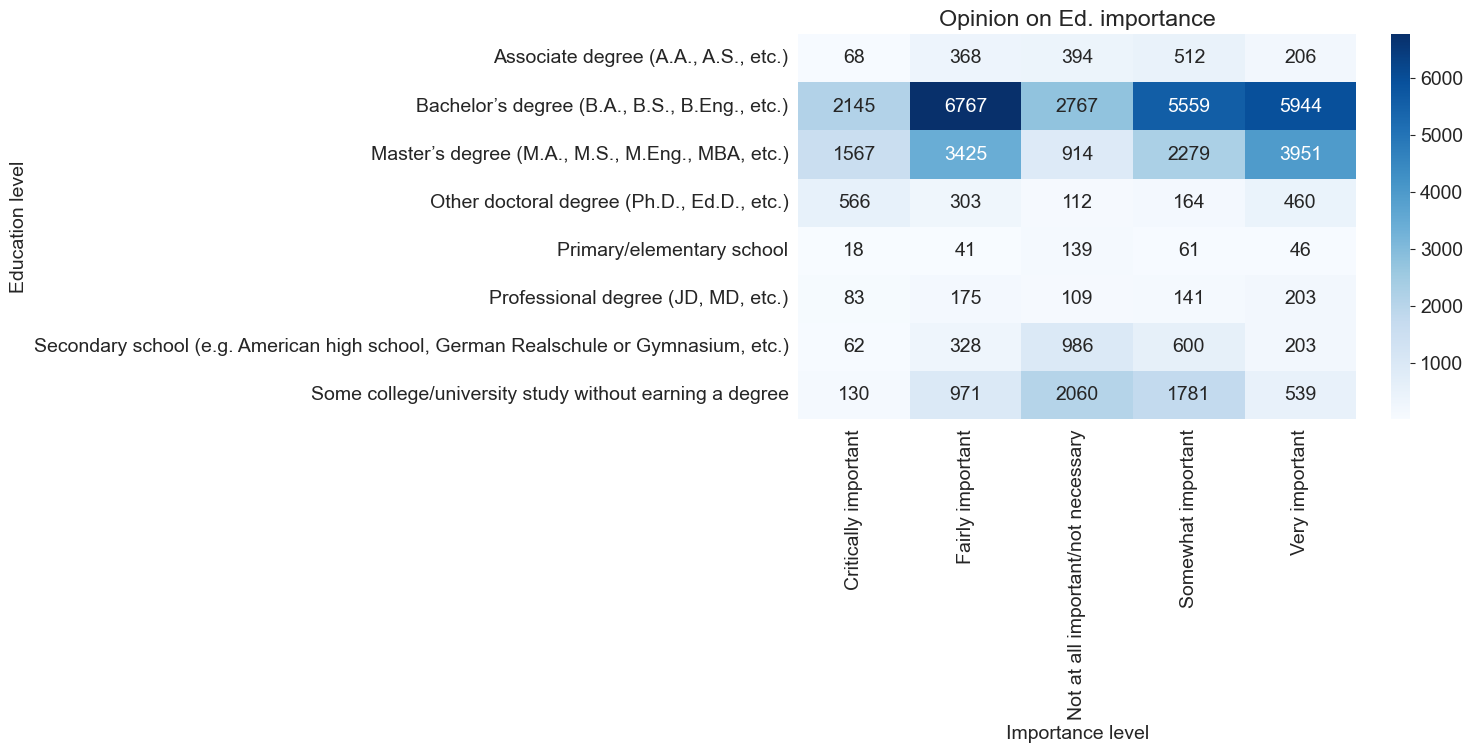

In [127]:
ed_analysis_df=survey_df.groupby(['EdLevel', 'NEWEdImpt']).size().unstack().fillna(0)
sns.heatmap(ed_analysis_df, annot=True, fmt='.0f',cmap='Blues')
plt.title('Opinion on Ed. importance')
plt.xlabel('Importance level')
plt.ylabel('Education level')
# plt.tight_layout()
plt.show()

In [128]:
ed_analysis_df

NEWEdImpt,Critically important,Fairly important,Not at all important/not necessary,Somewhat important,Very important
EdLevel,,,,,
"Associate degree (A.A., A.S., etc.)",68,368,394,512,206
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2145,6767,2767,5559,5944
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",1567,3425,914,2279,3951
"Other doctoral degree (Ph.D., Ed.D., etc.)",566,303,112,164,460
Primary/elementary school,18,41,139,61,46
"Professional degree (JD, MD, etc.)",83,175,109,141,203
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",62,328,986,600,203
Some college/university study without earning a degree,130,971,2060,1781,539


# Employment

Freelancing or contract work is a common choice among the programmer, so it would be interesting to compare the breakdown between full time, part time and freelance work. Let's visualize the datafrom Employment column.

In [129]:
schema.Employment

'Which of the following best describes your current employment status?'

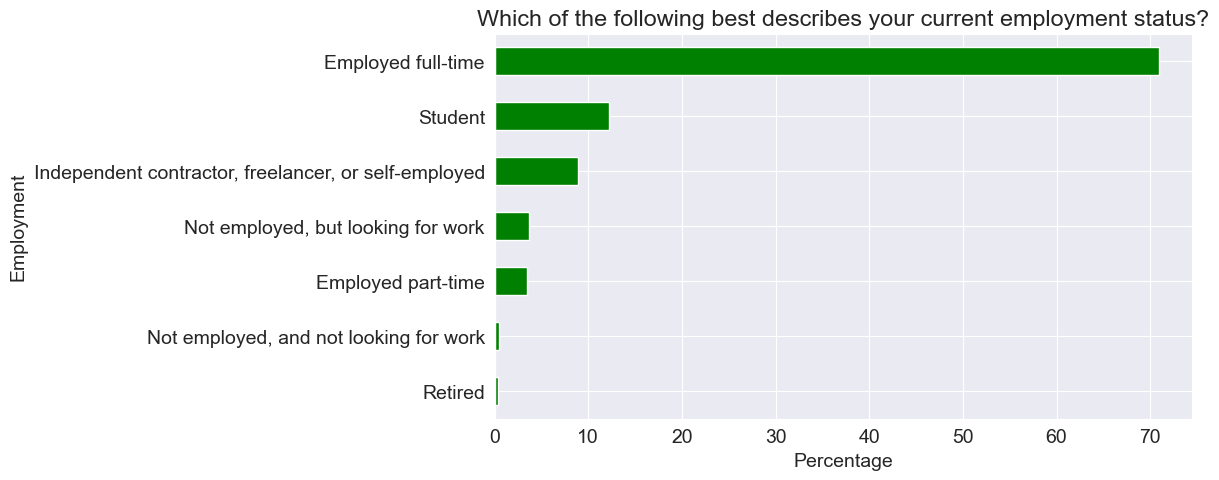

In [130]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part or as freelancers.

**Excercise**: Add a new column _EmploymentType_ which contains values _Enthusiast_ (student or not employed but looking for work), _Professional_ (employed full-time, part time or freelancing) and _Other_ (not employed or retired). For each of the graphs that follow, show a comparison between _Enthusiat_ and _Professional_.

The _DevType_ field contains info about the roles held by respondents. Since the question allows multiple answers, the column contains lists of valuese separated by ; which makes it a bit harder to analyze directly.

In [131]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [132]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                                          4396
Developer, back-end                                                                                                                                                                            3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                 2214
Developer, back-end;Developer, full-stack                                                                                                                                                      1465
Developer, front-end                                                                                                                                                                           1390
            

In [133]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    #iterate over the column
    for idx, value in col_series[col_series.notnull()].items():
        #Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            #mark the value in option column a True
            result_df.at[idx, option]=True
    return result_df[options]

In [134]:
dev_result_df = split_multicolumn(survey_df.DevType)
dev_result_df
# survey_df = pd.concat([survey_df, dev_result_df], axis=1)

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The _devtypedf_ has one column for each option that can be selected as a response. If a repondent has selection the option, the value in the column is _True_, otherwise it is false. 

We can now use the column-wise totals to identify the most common roles.

In [135]:
dev_type_totals=dev_result_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

In [136]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'Age_Group'],
      dtype='object')

# Asking and Answering Questions
We've done the Exploratory Data Analysis, now we need to ask some specific questions and try to answer them using data frame operations and interesting visualizations.

**Q. Which were the most popular programming languages in 2020**
To answer this, we can use the column _LanguageWorkedWIth_. Similar to _DevType_ respondents were allowed to choose multiple options here. 

In [137]:
survey_df.LanguageWorkedWith.value_counts()

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL                                                                           1065
HTML/CSS;JavaScript                                                                                    895
C#;HTML/CSS;JavaScript;SQL                                                                             849
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                  744
HTML/CSS;JavaScript;TypeScript                                                                         693
                                                                                                      ... 
Assembly;C;C#;C++;Dart;Go;Haskell;Java;JavaScript;Julia;Kotlin;Objective-C;PHP;Python;Ruby               1
Assembly;C;Go;Kotlin;Objective-C;Perl;PHP;Python;R                                                       1
Assembly;Scala                                                                                           1
Bash/Shell/PowerSh

In [138]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [139]:
Lang_result_df = split_multicolumn(survey_df.LanguageWorkedWith)


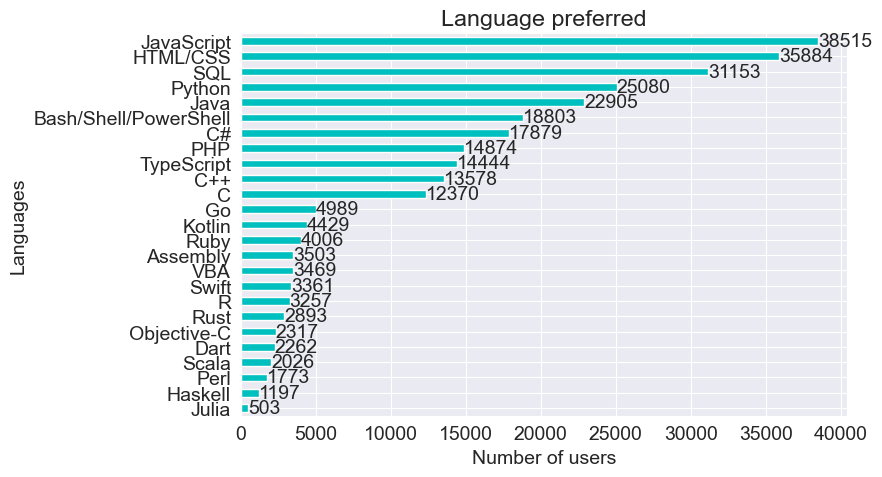

In [140]:
Lang_result_df.sum().sort_values(ascending=True).plot(kind='barh', color='c')
plt.xlabel('Number of users')
plt.ylabel('Languages')
plt.title('Language preferred')
# plt.figure(figsize=(20,20))

for i, v in enumerate(Lang_result_df.sum().sort_values(ascending=True)):
    plt.text(v + 1,                  # x-position (right of the bar)
             i,                      # y-position (index of the bar)
             str(v),                 # label text
             va='center')           # vertical alignment

plt.tight_layout()
plt.show()

Javascript & HTML/CSS comes out at the top as web dev is one of the most sought skills today and it also happens to be one of the easiest to get started with. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL on a regular basis. For other forms of development, python seems to be the popular choice, beating out Java which wa the industry standard for server and application dev for 2 decades.

**Excercise:**

* What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?

* What are the most common languages among respondents who do not describe themselves as "Developer, front end"?

* What are the most common languages among the respondents who work in fields related to data science?

* What are the most common languages used by developers older than 35 years of age?

* what are the most common languages used by developers in your country?


In [141]:
survey_df.Employment

0        Independent contractor, freelancer, or self-em...
1                                       Employed full-time
2                                                      NaN
3                                                      NaN
4                                       Employed full-time
                               ...                        
64456                                   Employed full-time
64457                                   Employed full-time
64458                                                  NaN
64459                                   Employed full-time
64460                                   Employed full-time
Name: Employment, Length: 64306, dtype: object

In [142]:
student_survey=survey_df[(survey_df['Employment'] =='Student')]
student_survey.shape

(7734, 21)

In [143]:
survey_df.shape

(64306, 21)

In [144]:
Student_lang = split_multicolumn(student_survey['LanguageWorkedWith'])

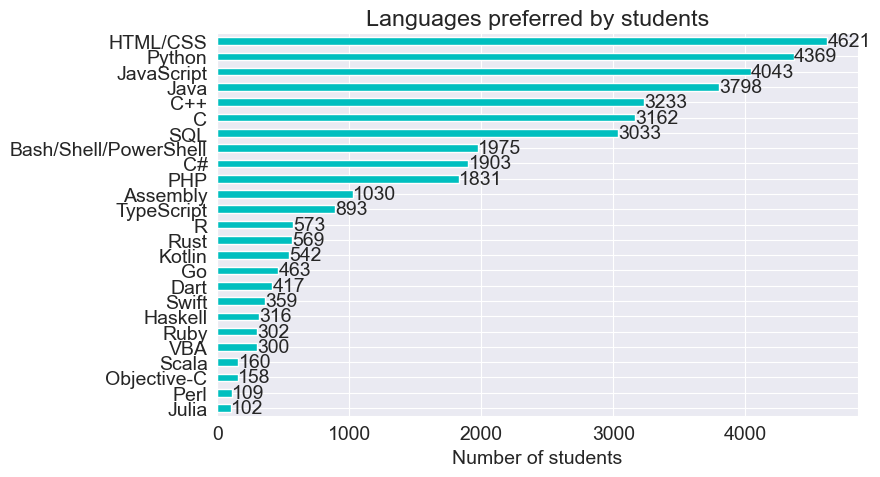

In [145]:
Student_lang.sum().sort_values(ascending=True).plot(kind='barh', color = 'c')
plt.title('Languages preferred by students')
plt.xlabel('Number of students')

for i, v in enumerate(Student_lang.sum().sort_values(ascending=True)):
    plt.text(v + 1,                  # x-position (right of the bar)
             i,                      # y-position (index of the bar)
             str(v),                 # label text
             va='center')           # vertical alignment

plt.tight_layout()
plt.show()

**Insight**: Among students, the most preferred languages are: HTML/CSS and Python, followed by JavaScript and Java.

In [146]:
Dev_survey=survey_df[~survey_df['DevType'].str.contains('Developer, front-end', case=False,na=False)]
Dev_survey.shape

(46178, 21)

In [147]:
survey_df.shape

(64306, 21)

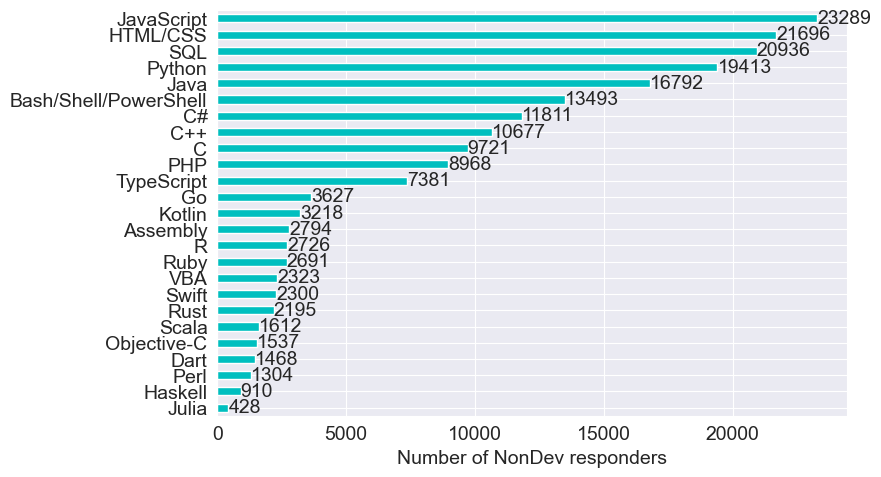

In [148]:
NonDev_lang = split_multicolumn(Dev_survey['LanguageWorkedWith'])
NonDev_lang.sum().sort_values(ascending=True).plot(kind='barh', color = 'c')
plt.xlabel('Number of NonDev responders')

for i, v in enumerate(NonDev_lang.sum().sort_values(ascending=True)):
    plt.text(v + 1,                  # x-position (right of the bar)
             i,                      # y-position (index of the bar)
             str(v),                 # label text
             va='center')           # vertical alignment

plt.tight_layout()
plt.show()


**Insights**: Among the coders with NonDev Background, The most common languages are JavaSCript, HTML/CSS and SQL. 

In [149]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [150]:
keyword1= ['Data', 'Scienctist']
keyword2= ['analyst']
data_science_survey=survey_df[survey_df['DevType'].str.contains('|'.join(keyword1+keyword2), case=False, na=False)]
data_science_survey

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,Age_Group
9,United Kingdom,22.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,14.0,8.0,4.0,HTML/CSS;Java;JavaScript;Python;SQL,...,Every few months,Visit Stack Overflow,Employed full-time,"Database administrator;Developer, full-stack;D...",36.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Fairly important,18-30
15,United Kingdom,45.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,8.0,37.0,23.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",50.0,Very satisfied,Industry that I’d be working in;Diversity of t...,Often: 1-2 days per week or more,Fairly important,45-60
21,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,10.0,2.0,Java;Python,...,Every few months,NaN,Employed full-time,"Developer, full-stack;Engineer, data",50.0,Slightly dissatisfied,NaN,Often: 1-2 days per week or more,Very important,Nan
24,Portugal,NaN,Man,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",No,25.0,23.0,18.0,Bash/Shell/PowerShell;C,...,Once every few years,Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, full-stack;DevO...",40.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Critically important,Nan
26,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",Yes,12.0,20.0,20.0,Bash/Shell/PowerShell;C;C++;Java;Python;SQL,...,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Database administrator;Developer, full-stack;E...",NaN,NaN,NaN,NaN,Somewhat important,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64432,United Kingdom,NaN,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,14.0,13.0,NaN,Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;JavaSc...,...,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,"Independent contractor, freelancer, or self-em...",Data scientist or machine learning specialist;...,NaN,NaN,NaN,NaN,Fairly important,Nan
64437,Pakistan,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,25.0,NaN,3.0,NaN,...,Once every few years,Visit Stack Overflow,Employed full-time,Data or business analyst,NaN,NaN,NaN,NaN,Very important,Nan
64446,Australia,NaN,Man,Primary/elementary school,NaN,Yes,8.0,6.0,2.0,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...,...,Every few months,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...",Academic researcher;Data or business analyst;D...,NaN,NaN,NaN,NaN,Critically important,Nan
64451,Poland,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,19.0,2.0,NaN,NaN,...,NaN,NaN,"Not employed, but looking for work",Data scientist or machine learning specialist,NaN,NaN,NaN,NaN,Fairly important,Nan


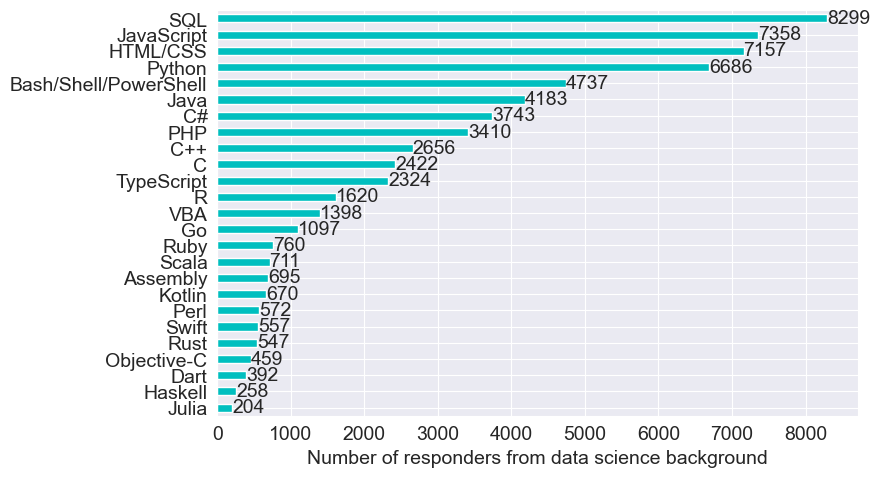

In [151]:
datascience_survey = split_multicolumn(data_science_survey['LanguageWorkedWith'])
datascience_survey.sum().sort_values(ascending=True).plot(kind ='barh', color='c')
plt.xlabel('Number of responders from data science background')

for i, v in enumerate(datascience_survey.sum().sort_values(ascending=True)):
    plt.text(v + 1,                  # x-position (right of the bar)
             i,                      # y-position (index of the bar)
             str(v),                 # label text
             va='center')           # vertical alignment

plt.tight_layout()
plt.show()

**Insight**: Among the programmers in Data Science profile, SQL is the most used programming language, while JavaScript and HTML/CSS have nearly the same demand. Among others, Python is another notable language preferred by these responders.

In [152]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                                          4396
Developer, back-end                                                                                                                                                                            3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                 2214
Developer, back-end;Developer, full-stack                                                                                                                                                      1465
Developer, front-end                                                                                                                                                                           1390
            

In [153]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'Age_Group'],
      dtype='object')

In [154]:
dev_result_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [155]:
survey_df.Age_Group.value_counts()

Age_Group
18-30            22520
Nan              19238
30-45            17352
45-60             3416
10-18             1181
Older than 60      599
Name: count, dtype: int64

In [156]:
older_survey=survey_df[survey_df['Age'] > 35]
older_survey

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,Age_Group
7,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17.0,13.0,Python;SQL,...,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,30-45
11,Spain,49.0,Man,Some college/university study without earning ...,Mathematics or statistics,No,42.0,7.0,7.0,HTML/CSS;JavaScript,...,Once every few years,Visit Stack Overflow,Employed full-time,"Designer;Developer, front-end",40.0,Very dissatisfied,Remote work options;Office environment or comp...,Rarely: 1-2 days per year or less,Somewhat important,45-60
12,Netherlands,53.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,14.0,35.0,20.0,C;JavaScript;Python,...,Once every few years,Call a coworker or friend;Go for a walk or oth...,Employed full-time,"Designer;Developer, back-end",36.0,Very satisfied,Industry that I’d be working in;Financial perf...,Rarely: 1-2 days per year or less,Not at all important/not necessary,45-60
15,United Kingdom,45.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,8.0,37.0,23.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",50.0,Very satisfied,Industry that I’d be working in;Diversity of t...,Often: 1-2 days per week or more,Fairly important,45-60
19,Spain,40.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,18.0,22.0,17.0,Java;JavaScript;SQL,...,Once every few years,Meditate;Call a coworker or friend;Go for a wa...,Employed full-time,"Developer, desktop or enterprise applications",50.0,Neither satisfied nor dissatisfied,NaN,Often: 1-2 days per week or more,Very important,30-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64388,United States,56.0,Man,"Associate degree (A.A., A.S., etc.)","A health science (such as nursing, pharmacy, r...",Yes,50.0,2.0,NaN,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,...,Once a year,NaN,Retired,NaN,NaN,NaN,NaN,NaN,Very important,45-60
64392,Bangladesh,36.0,NaN,NaN,NaN,Yes,35.0,NaN,12.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,Meditate;Play games;Call a coworker or friend;...,Employed full-time,Academic researcher;Data or business analyst;D...,NaN,NaN,NaN,NaN,Critically important,30-45
64411,Belgium,44.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,15.0,NaN,NaN,NaN,...,NaN,Visit another developer community (please name):,NaN,NaN,NaN,NaN,NaN,NaN,Fairly important,30-45
64430,Israel,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Yes,35.0,3.0,NaN,HTML/CSS;JavaScript;Python,...,Every few months,Meditate;Play games;Call a coworker or friend;...,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,Fairly important,30-45


In [157]:
older_survey.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'Age_Group'],
      dtype='object')

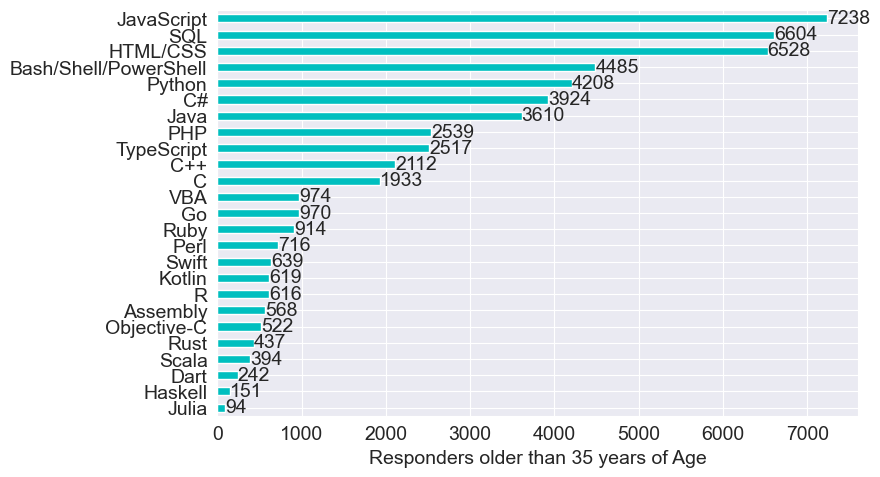

In [158]:
older_survey_final=split_multicolumn(older_survey['LanguageWorkedWith'])
older_survey_final.sum().sort_values(ascending=True).plot(kind ='barh', color='c')
plt.xlabel('Responders older than 35 years of Age')
for i, v in enumerate(older_survey_final.sum().sort_values(ascending=True)):
    plt.text(v + 1,                  # x-position (right of the bar)
             i,                      # y-position (index of the bar)
             str(v),                 # label text
             va='center')           # vertical alignment

plt.tight_layout()
plt.show()


**Insight**: Among the programmers of age 35 and more, the most preferred coding languages is JavaScript, while SQL and HTML/CSS have slight difference only.

In [159]:
survey_df.Country.unique().tolist()

['Germany',
 'United Kingdom',
 'Russian Federation',
 'Albania',
 'United States',
 'India',
 'Tunisia',
 'Spain',
 'Netherlands',
 'France',
 'Belgium',
 'Portugal',
 'Canada',
 'China',
 'Ukraine',
 'Italy',
 'Brazil',
 'Austria',
 'Mexico',
 'Sweden',
 'Poland',
 'Indonesia',
 'Greece',
 'Israel',
 'Czech Republic',
 nan,
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Serbia',
 'Switzerland',
 'Hungary',
 'Nepal',
 'Slovenia',
 'Uruguay',
 'Denmark',
 'Pakistan',
 'Taiwan',
 'Romania',
 'Finland',
 'Costa Rica',
 'Nigeria',
 'Chile',
 'Turkey',
 'Panama',
 'Ireland',
 'Estonia',
 'Philippines',
 'Australia',
 'Nomadic',
 'Peru',
 'Cyprus',
 'Sri Lanka',
 'Kenya',
 'Norway',
 'Iran',
 'Croatia',
 'Egypt',
 'Argentina',
 'Ghana',
 'Latvia',
 'Morocco',
 'Bangladesh',
 'Ecuador',
 'Haiti',
 'Venezuela, Bolivarian Republic of...',
 'Colombia',
 'Lithuania',
 'El Salvador',
 'Honduras',
 'Ethiopia',
 'Lebanon',
 'Uganda',
 'Algeria',
 'Viet Nam',
 'Guatemala',
 'Syrian Arab Republic',
 'Afgh

In [160]:
Homecountry=survey_df[(survey_df['Country']=='India')]
Homecountry_survey=split_multicolumn(Homecountry['LanguageWorkedWith'])

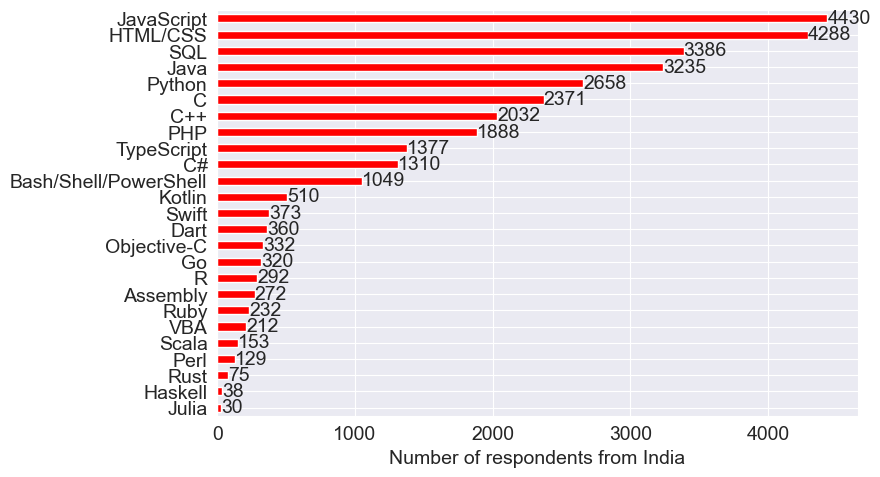

In [161]:
Homecountry_survey.sum().sort_values(ascending=True).plot(kind ='barh', color='r')
plt.xlabel('Number of respondents from India')
# Add data labels to each bar
for i, v in enumerate(Homecountry_survey.sum().sort_values(ascending=True)):
    plt.text(v + 1,                  # x-position (right of the bar)
             i,                      # y-position (index of the bar)
             str(v),                 # label text
             va='center')           # vertical alignment

plt.tight_layout()
plt.show()

**Insight**: The most popular languages in India among the prrogrammers is JavaScript and HTML/CSS.

**Q. Which languages are the most people interested to over the next year?**

For this we can use the _LanguageDesireNextYear_ column, with similar processing as the previous one.

In [171]:
language_interested_df =split_multicolumn(survey_df.LanguageDesireNextYear)
language_interested_percentage= language_interested_df.mean().sort_values(ascending=False)*100
language_interested_percentage

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

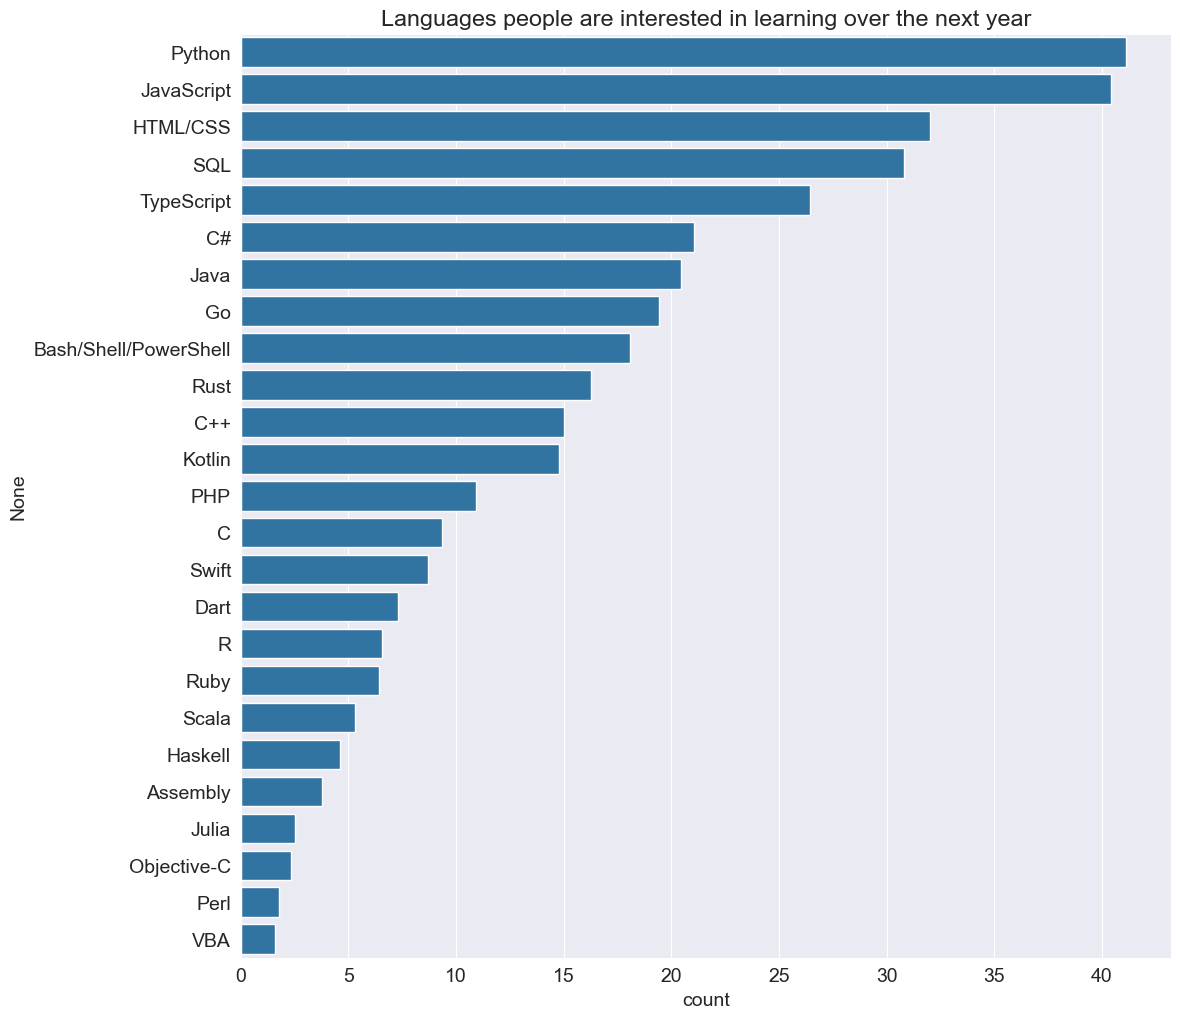

In [172]:
plt.figure(figsize=(12,12))
sns.barplot(x=language_interested_percentage, y=language_interested_percentage.index)
plt.title('Languages people are interested in learning over the next year')
plt.xlabel('count');


**Insight**: Here, python language is the language that most people are interested in learning, since its an easy-to-learn general purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc.

**Excercise**: Repeat all the excercises from the previous question, replacing 'most common languages' with 'languages people are interested in learning'.

**Q: Which are the most loved languages i.e. a high percentages  of people who have used the language and want to continue learning and using it over the next year?**

This can be done using simple Pandas array operations. 
* Create a new data frame `language_loved_df` which contains a `True` value for a language only if the corresponding values in `language_result_df` and `language_interested_df` are both `True`.
* Take the column wise sum of `language_loved_df` and divide it by the column-wise sum of `language_result_df` to get the percentage of respondents who "love" the language.
* Sort the results in decreasing order and plot a horizontal bar graph.

In [178]:
False & True

False

In [179]:
Lang_result_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [180]:
language_interested_df

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [186]:
language_loved_df = Lang_result_df & language_interested_df 
language_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [187]:
languages_loved_percentages = (language_loved_df.sum()*100/Lang_result_df.sum()).sort_values(ascending=False)
languages_loved_percentages

Rust                     86.069824
TypeScript               67.114373
Python                   66.598884
Kotlin                   62.813276
Go                       62.176789
Dart                     62.068966
Julia                    61.431412
C#                       59.623021
Swift                    59.476346
JavaScript               58.353888
SQL                      56.607710
Bash/Shell/PowerShell    53.688241
HTML/CSS                 53.494594
Scala                    53.257651
Haskell                  51.378446
R                        44.427387
Java                     44.108273
C++                      43.415820
Ruby                     42.735896
PHP                      37.232755
C                        32.983023
Assembly                 29.089352
Perl                     28.369994
Objective-C              23.133362
VBA                      19.458057
dtype: float64

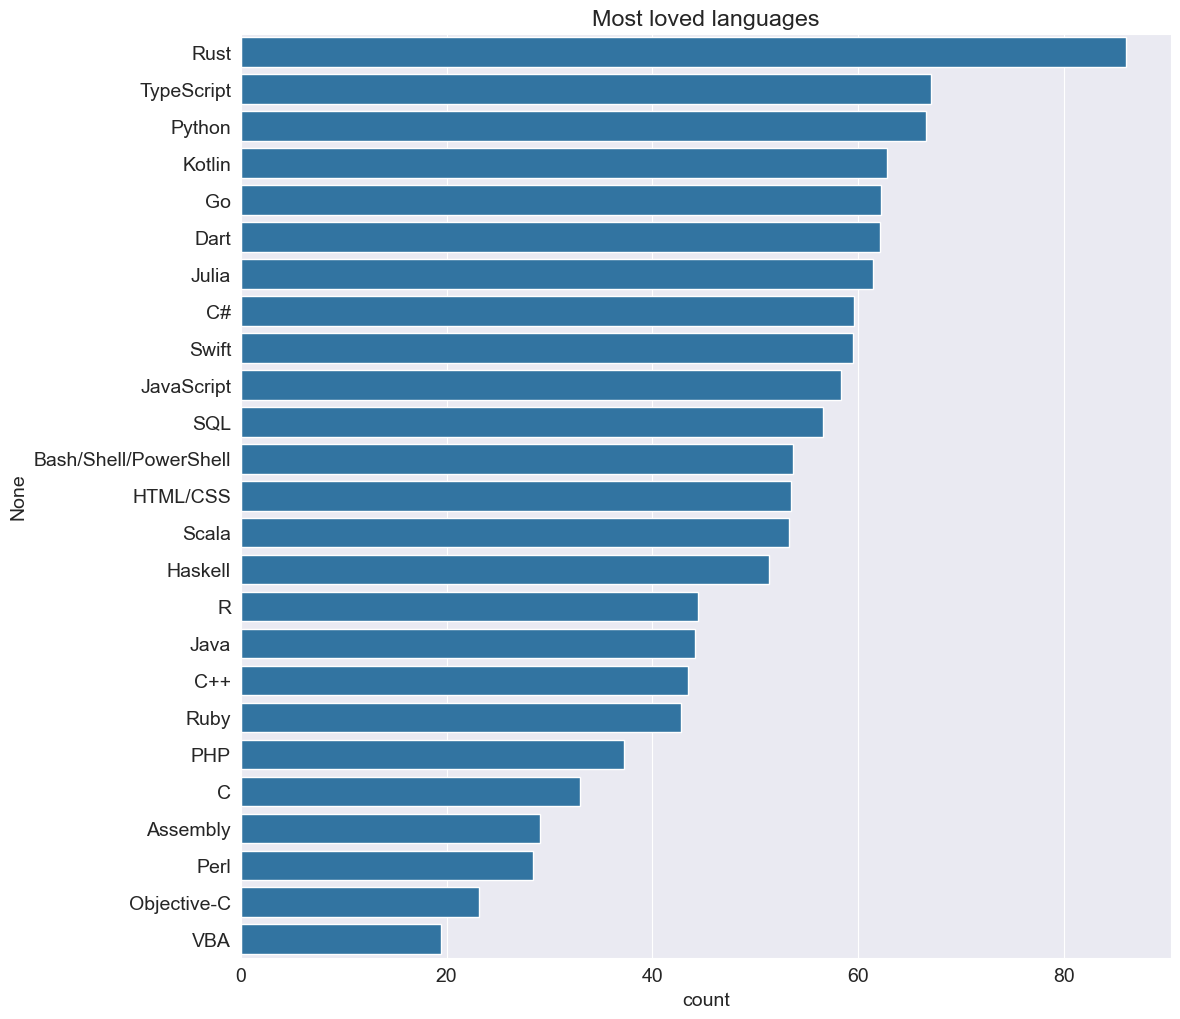

In [189]:
plt.figure(figsize=(12,12))
sns.barplot(x=languages_loved_percentages,y=languages_loved_percentages.index)
plt.title('Most loved languages')
plt.xlabel('count');

**Insight:** Rust has been Stackoverflow's most-loved language for 4 years in a row, followed by TypeScript which has gained a lot of popularity in the past few years as a good alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely used languages in world. This is testament to the fact the language has a solid foundation, is really easy to learn and use, has a strong ecosystem of libraries for various and massive worldwide community of developers to enjoy using it.

**Excercises:** What are the most dreaded languages i.e. languages which people have used in the part year, but do not want to learn/use over the next year. 

In [190]:
language_dreaded = Lang_result_df & ~language_interested_df

Text(0.5, 1.0, 'Most dreaded languages')

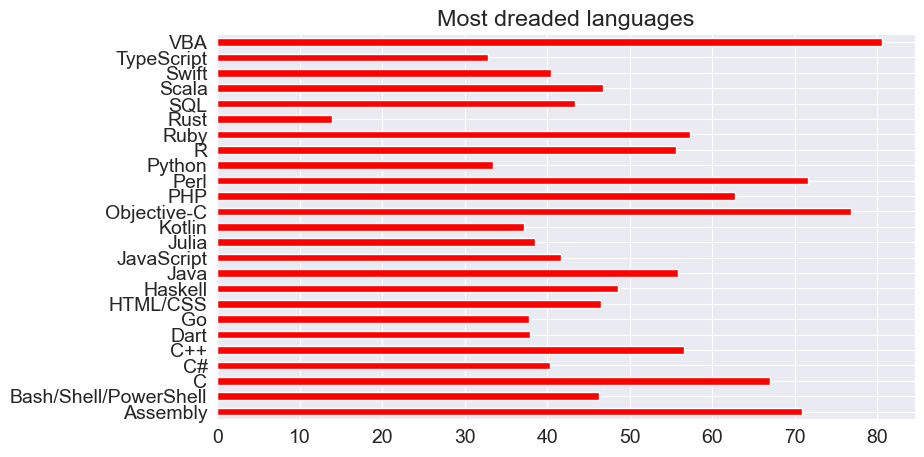

In [195]:
language_dreaded_percentage = language_dreaded.sum()*100/Lang_result_df.sum().sort_values(ascending=False)
language_dreaded_percentage.plot(kind='barh', color='r')
plt.title('Most dreaded languages')

**Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.**

To answer this question, we'll need to use the groupby dataframe method to aggregate the rows for each country. We'll also need to filter the results to only include the countries which have more than 250 respondents.

In [198]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs', 'Age']].mean().sort_values('WorkWeekHrs', ascending=False)
countries_df

,WorkWeekHrs,Age
Country,,
Kuwait,58.222222,29.111111
Iraq,52.153846,24.736842
Grenada,50.000000,NaN
Maldives,47.300000,18.666667
Afghanistan,46.500000,23.571429
...,...,...
North Korea,NaN,NaN
Saint Lucia,NaN,31.000000
Sierra Leone,NaN,27.000000


In [200]:
high_response_countries = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)
high_response_countries

,WorkWeekHrs,Age
Country,,
Iran,44.337748,27.521490
Israel,43.915094,32.605649
China,42.150000,26.988636
United States,41.802982,33.722058
Greece,41.402724,31.725490
Viet Nam,41.391667,25.786585
South Africa,41.023460,32.127027
Turkey,40.982143,29.522772
Sri Lanka,40.612245,26.965714


**Q: How important is it to start young to build a career in programming?**

We need to create a scatter plot of `Age` vs `YearsCodePro` (i.e. years of coding experience) to answer this question.